##<font color='REDBLUE'>**Plano de Saude**</font>

# 1° Problema de Negócio

O trabalho aqui é desenvolver uma metodologia para previsão do valor do plano de Saúde para seus beneficiários.

# 2° Análise Exploratória

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Train dataset:
dados = pd.read_csv('/content/Train_Data.csv')
# Top 5 records:
dados.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


## Descrição das Variáveis

- **age**: A idade da pessoa

- **sex**:Indica o sexo da pessoa (*F* ou *M*)

- **bmi**: Índice de massa corporal 

- **smoker**: Indica se a pessoa é *fumante* ou *não*

- **region**: Região

- **children**: Indica o número de filhos que a pessoa tem.

- **charges**: Despesas com o plano de saúde (*ou seja, o valor pago pelo plano adquirido*)

In [3]:
# Verificar o tamanho da base de dados "(Linhas, Colunas"
dados.shape

(3630, 7)

In [4]:
# Verificando o tipo de dados
dados.dtypes

age         float64
sex          object
bmi         float64
smoker       object
region       object
children      int64
charges     float64
dtype: object

In [5]:
# Informações dos Atributos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [6]:
# Verificando a quantidade de itens
dados.count()

age         3630
sex         3630
bmi         3630
smoker      3630
region      3630
children    3630
charges     3630
dtype: int64

In [7]:
# Verificando se há valores ausentes
dados.isnull().sum().sum()

0

In [8]:
# Verificando se há valores duplicados
dados.duplicated().sum()

679

In [9]:
# Eliminando linhas duplicadas
df = dados.drop_duplicates()

In [10]:
# Estatísticas descritivas das variáveis
dados.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Descrição das variáveis Categóricas
dados.describe(include=['O'])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


### *Analisando a variavel* <font color = 'Chocolate'> **charges**</font>

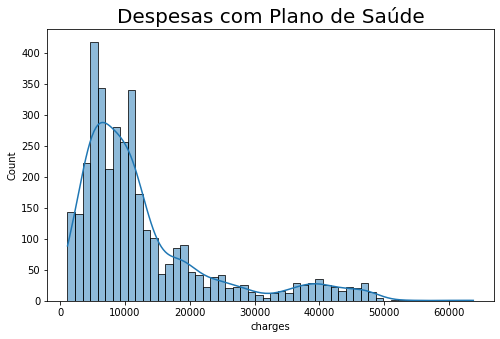

In [12]:
# Histrograma das despesas com o Plano
plt.figure(figsize=(8,5))
sns.histplot(dados['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


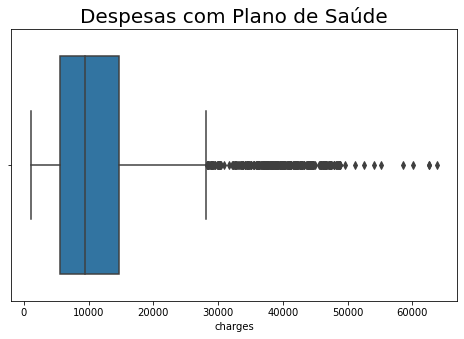

In [13]:
# Boxplot das despesas com o Plano
plt.figure(figsize=(8,5))
sns.boxplot(dados['charges'])
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **age**</font>

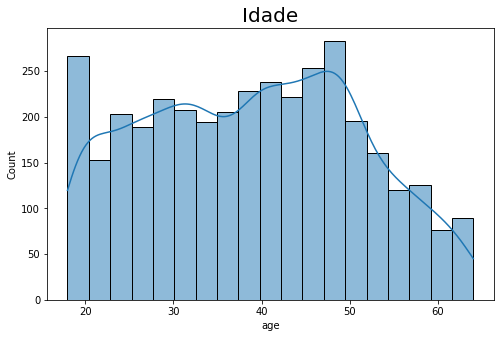

In [14]:
# Histrograma da variável Age
plt.figure(figsize=(8,5))
sns.histplot(dados['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


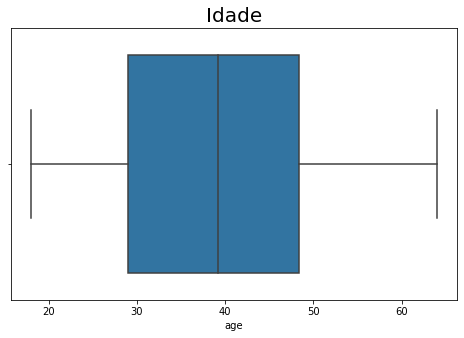

In [15]:
# Boxplot da variável Age:
plt.figure(figsize=(8,5))
sns.boxplot(dados['age'])
plt.title('Idade', fontsize=20)
plt.show();

### *Analisando a variavel* <font color = 'Chocolate'> **bmi**</font>

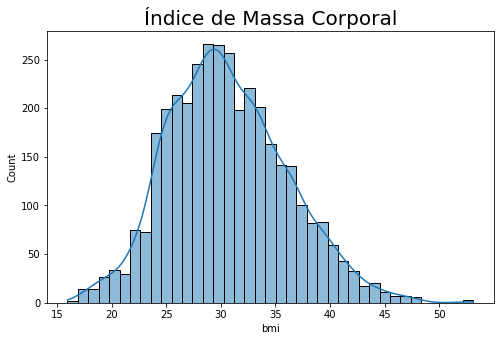

In [16]:
# Histrograma da variável bmi
plt.figure(figsize=(8,5))
sns.histplot(dados['bmi'], kde=True)
plt.title('Índice de Massa Corporal', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


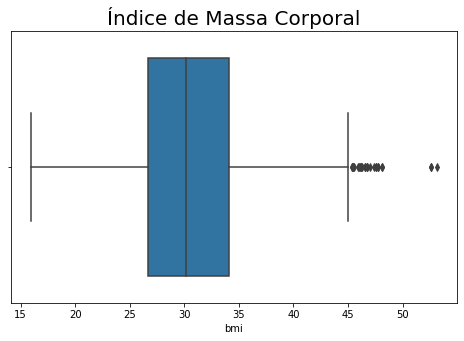

In [17]:
# Boxplot  da variável bmi
plt.figure(figsize=(8,5))
sns.boxplot(dados['bmi'])
plt.title('Índice de Massa Corporal', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **children**</font>

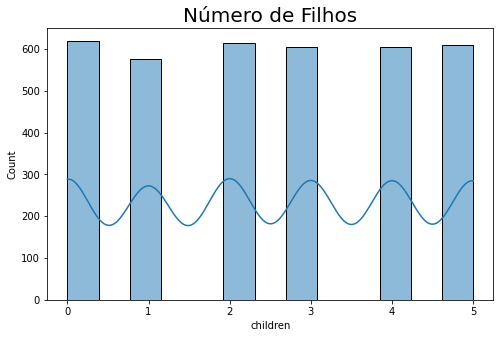

In [18]:
# Histrogram of children:
plt.figure(figsize=(8,5))
sns.histplot(dados['children'], kde=True)
plt.title('Número de Filhos', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


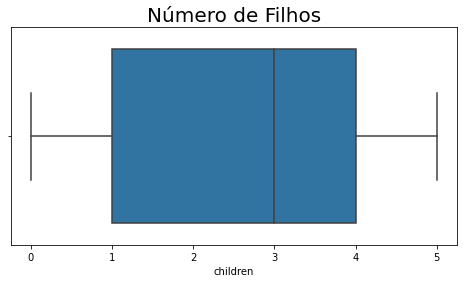

In [19]:
# Boxplot of children:
plt.figure(figsize=(8,4))
sns.boxplot(dados['children'])
plt.title('Número de Filhos', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **sex**</font>

Male   : 2029
Female : 1601


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


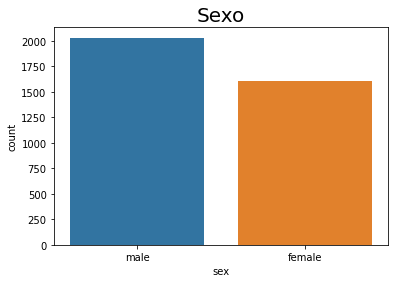

In [22]:
# Fazendo a Contagem
print("Male   :", dados['sex'].value_counts()[0])
print("Female :", dados['sex'].value_counts()[1])

# Visualização 
plt.figure(figsize=(6,4))
sns.countplot(dados['sex'])
plt.title('Sexo', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **smoker**</font>

Smokers     : 560
Non-Smokers : 3070


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


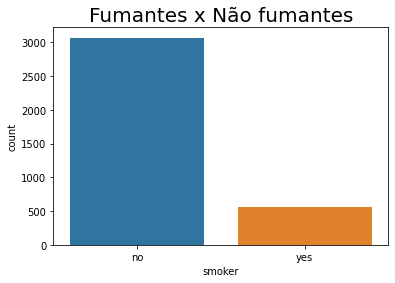

In [23]:
#Fazendo a Contagem
print("Smokers     :", dados['smoker'].value_counts()[1])
print("Non-Smokers :", dados['smoker'].value_counts()[0])

# Visualização
sns.countplot(dados['smoker'])
sns.countplot(dados['smoker'])
plt.title('Fumantes x Não fumantes', fontsize=20)
plt.show()

### *Analisando a variavel* <font color = 'Chocolate'> **region**</font>

South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


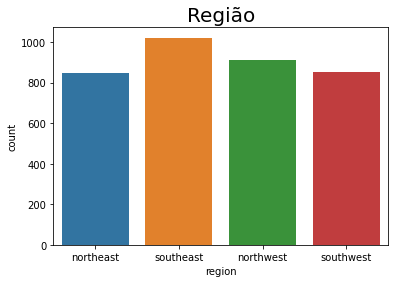

In [24]:
# # Fazendo a Contagem
print("South-East region :", dados['region'].value_counts()[0])
print("North-West region :", dados['region'].value_counts()[1])
print("South-West region :", dados['region'].value_counts()[2])
print("North-East region :", dados['region'].value_counts()[3])

# Visualização
sns.countplot(dados['region'])
sns.countplot(dados['region'])
plt.title('Região', fontsize=20)
plt.show()

#3° Pré-Processamento dos Dados

## <font color = 'Tomato'> **One-Hot Encoder**</font>

In [25]:
# Instalando a Categória Encoder
!pip install Category_Encoders

     |████████████████████████████████| 86 kB 4.9 MB/s 


In [26]:
# Importando o codificador
from category_encoders.one_hot import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
# Criando o codificador
one_hot_enc = OneHotEncoder(cols = ['sex', 'smoker','region'], use_cat_names=True)

In [28]:
# Transformando a colunas
df_novo = one_hot_enc.fit_transform(dados)
df_novo.head()

,age,sex_male,sex_female,bmi,smoker_no,smoker_yes,region_northeast,region_southeast,region_northwest,region_southwest,children,charges
0,21.000000,1,0,25.745000,1,0,1,0,0,0,2,3279.868550
1,36.976978,0,1,25.744165,0,1,0,1,0,0,3,21454.494239
2,18.000000,1,0,30.030000,1,0,0,1,0,0,1,1720.353700
3,37.000000,1,0,30.676891,1,0,1,0,0,0,3,6801.437542
4,58.000000,1,0,32.010000,1,0,0,1,0,0,1,11946.625900


#### Separando os dados em <font color = 'Toby'> **X e y**</font>

In [29]:
# Variável independente & Dependente
X = df_novo.iloc[:, :-1]
y = df_novo.iloc[:, -1]

In [30]:
# Visualizando o X
X.head()

,age,sex_male,sex_female,bmi,smoker_no,smoker_yes,region_northeast,region_southeast,region_northwest,region_southwest,children
0,21.000000,1,0,25.745000,1,0,1,0,0,0,2
1,36.976978,0,1,25.744165,0,1,0,1,0,0,3
2,18.000000,1,0,30.030000,1,0,0,1,0,0,1
3,37.000000,1,0,30.676891,1,0,1,0,0,0,3
4,58.000000,1,0,32.010000,1,0,0,1,0,0,1


#### <font color = 'ligthstee'> **Separando os dados em Treino e Teste**</font>


In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 4° e 5° Construção e Avaliação da Máquina Preditiva 

In [32]:
# Importando as métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

## <font color = 'Red'> **Regressão Linear**</font>

In [33]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Construindo a Máquina Preditiva
Modelo1 = LinearRegression()

# Treinando a Máquina Preditiva
Modelo1 = Modelo1.fit(X_train, y_train)

# Fazendo Predições
y_pred = Modelo1.predict(X_test)

# Calculando os Scores do Modelo
print('O valor de R2 é igual a:  {}\n'.format(r2_score(y_test, y_pred)))
print('O erro médio quadratico é igual a: {}'.format(mean_squared_error(y_test, y_pred)))

O valor de R2 é igual a:  0.7485198191686155

O erro médio quadratico é igual a: 30867003.994512063


## <font color = 'Red'> **Regressão Ridge**</font>

In [34]:
# Ridge
from sklearn.linear_model import Ridge

# Construindo a Máquina Preditiva
Modelo2 = Ridge()

# Treinando a Máquina Preditiva
Modelo2 = Modelo2.fit(X_train, y_train)

# Fazendo Predições
y_pred = Modelo2.predict(X_test)

# Calculando os Scores do Modelo
print('O valor de R2 é igual a:  {}\n'.format(r2_score(y_test, y_pred)))
print('O erro médio quadratico é igual a: {}'.format(mean_squared_error(y_test, y_pred)))

O valor de R2 é igual a:  0.7484419880068398

O erro médio quadratico é igual a: 30876557.092388347


## <font color = 'Red'> **Regressão Lasso**</font>

In [35]:
# Lasso:
from sklearn.linear_model import Lasso

# Construindo a Máquina Preditiva
Modelo3 = Lasso()

# Treinando a Máquina Preditiva
Modelo3 = Modelo3.fit(X_train, y_train)

# Fazendo Predições
y_pred = Modelo3.predict(X_test)

# Calculando os Scores do Modelo
print('O valor de R2 é igual a:  {}\n'.format(r2_score(y_test, y_pred)))
print('O erro médio quadratico é igual a: {}'.format(mean_squared_error(y_test, y_pred)))

O valor de R2 é igual a:  0.7484683506199983

O erro médio quadratico é igual a: 30873321.31101195


## <font color = 'Red'> **Regressão com Random Forest**</font>

In [36]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor

# Construindo a Máquina Preditiva
Modelo4 = RandomForestRegressor()

# Treinando a Máquina Preditiva
Modelo4 = Modelo4.fit(X_train, y_train)

# Fazendo Predições
y_pred = Modelo4.predict(X_test)

# Calculando os Scores do Modelo
print('O valor de R2 é igual a:  {}\n'.format(r2_score(y_test, y_pred)))
print('O erro médio quadratico é igual a: {}'.format(mean_squared_error(y_test, y_pred)))

O valor de R2 é igual a:  0.910407401239341

O erro médio quadratico é igual a: 10996711.926488522


# <font color = 'Redblue'> **Salvando o Modelo escolhido**</font>

In [37]:
# Criando um modelo Pickle para ser salvo
import pickle
filename = 'PlanoSaude.pkl'
pickle.dump(Modelo4, open(filename, 'wb'))

In [38]:
# Carregando o modelo
with open('PlanoSaude.pkl', 'rb') as arquivo:
  modelo = pickle.load(arquivo)

print(modelo)

RandomForestRegressor()
